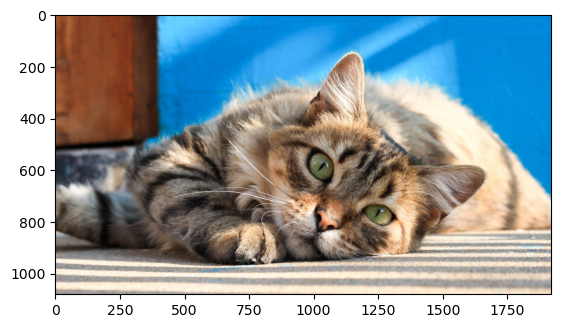

In [4]:
import matplotlib.pyplot as plt
import mxnet as mx 
from mxnet.gluon.data.vision import transforms

example_image = mx.image.imread('data/cat.jpg')
plt.imshow(example_image.asnumpy())

In [13]:
# RandomResizedCrop을 적용하기 위한 함수 생성
def show_images(imgs, num_rows, num_cols, scale=2):
    aspect_ratio = imgs[0].shape[0]/imgs[0].shape[1] # 확장할 이미지의 크기 조정
    figsize = (num_cols * scale, num_rows * scale * aspect_ratio)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i,j].imshow(imgs[i*num_cols + j].asnumpy())
            axes[i,j].axes.get_xaxis().set_visible(False) # x축 전체를 숨김
            axes[i,j].axes.get_yaxis().set_visible(False) # y축 전체를 숨김
    
    plt.subplots_adjust(hspace=0.1, wspace=0)
    return axes


def apply(img, aug, num_rows=2, num_cols=4, scale=3):
    y = [aug(img) for _ in range(num_rows*num_cols)] # 다양한 샘플을 얻기위해 여러번 데이터 확장 적용 
    show_images(y, num_rows, num_cols, scale)

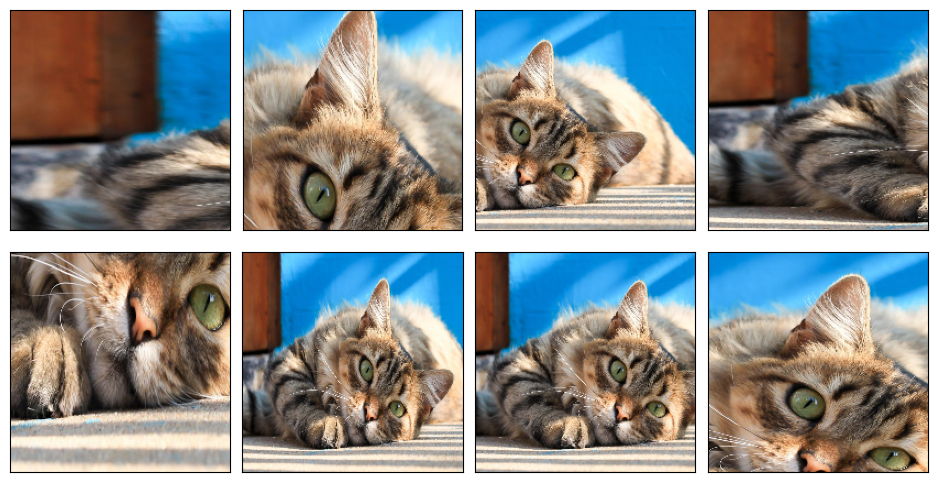

In [14]:
shape_aug = transforms.RandomResizedCrop(size=(200,200), scale=(0.1,1), ratio=(0.5,2))

apply(example_image, shape_aug)